# **Task 3**

## **DJS Synapse Learning Period**
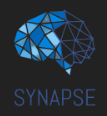

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [3]:
df_train  = pd.read_csv('/content/drive/MyDrive/synapse_w3/titanic_data.csv')

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [4]:
def titanic_preprocessing_pipeline(df):
  titl = []
  number=[]
  n1 = []
  n2 = []
  s1 = MinMaxScaler()
  s2 = StandardScaler()
  for name in df['Name']:
    title_search = re.search('(\w+)\.', name)
    title = title_search.group(1)
    titl.append(title)
  df['Title'] = titl
  df = df.drop(['PassengerId', 'Ticket', 'Name'], axis =1)
  df.drop('Cabin', axis =1,inplace =True)
  df['Embarked'].fillna(value = df['Embarked'].mode()[0], inplace =True)
  df['Age'].fillna(value = df['Age'].mean(), inplace =True)
  for i in df.Parch:
    n2.append(i)
  for i in df.SibSp:
    n1.append(i)
  for i in range(len(n1)):
    number.append(n1[i]+n2[i])
  df['Family_members'] = number
  df['S_Age'] = s1.fit_transform(df[['Age']])
  df['S_Fare'] = s2.fit_transform(df[['Fare']])
  df['S_Family_members'] = s2.fit_transform(df[['Family_members']])
  df = pd.get_dummies(df,columns = ['Pclass', 'Sex', 'Title', 'Embarked'])
  df.drop(['Age','SibSp', 'Parch', 'Fare', 'Family_members'], axis =1, inplace =True)
  return df

df_proccesd = titanic_preprocessing_pipeline(df_train)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [5]:
y = df_proccesd['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [6]:
df_proccesd.drop(['Survived'], axis =1, inplace =True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_proccesd, y, test_size=0.3)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [8]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_output = decision_tree_model.predict(X_test)
acc = accuracy_score(y_test,y_output)

<b>print the test accuracy and train accuracy here</b>

In [10]:
print(decision_tree_model.score(X_train, y_train))
print(acc)

0.985553772070626
0.8059701492537313


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

Max Accuracy depth = 4 
Accuracy value = 0.8470149253731343


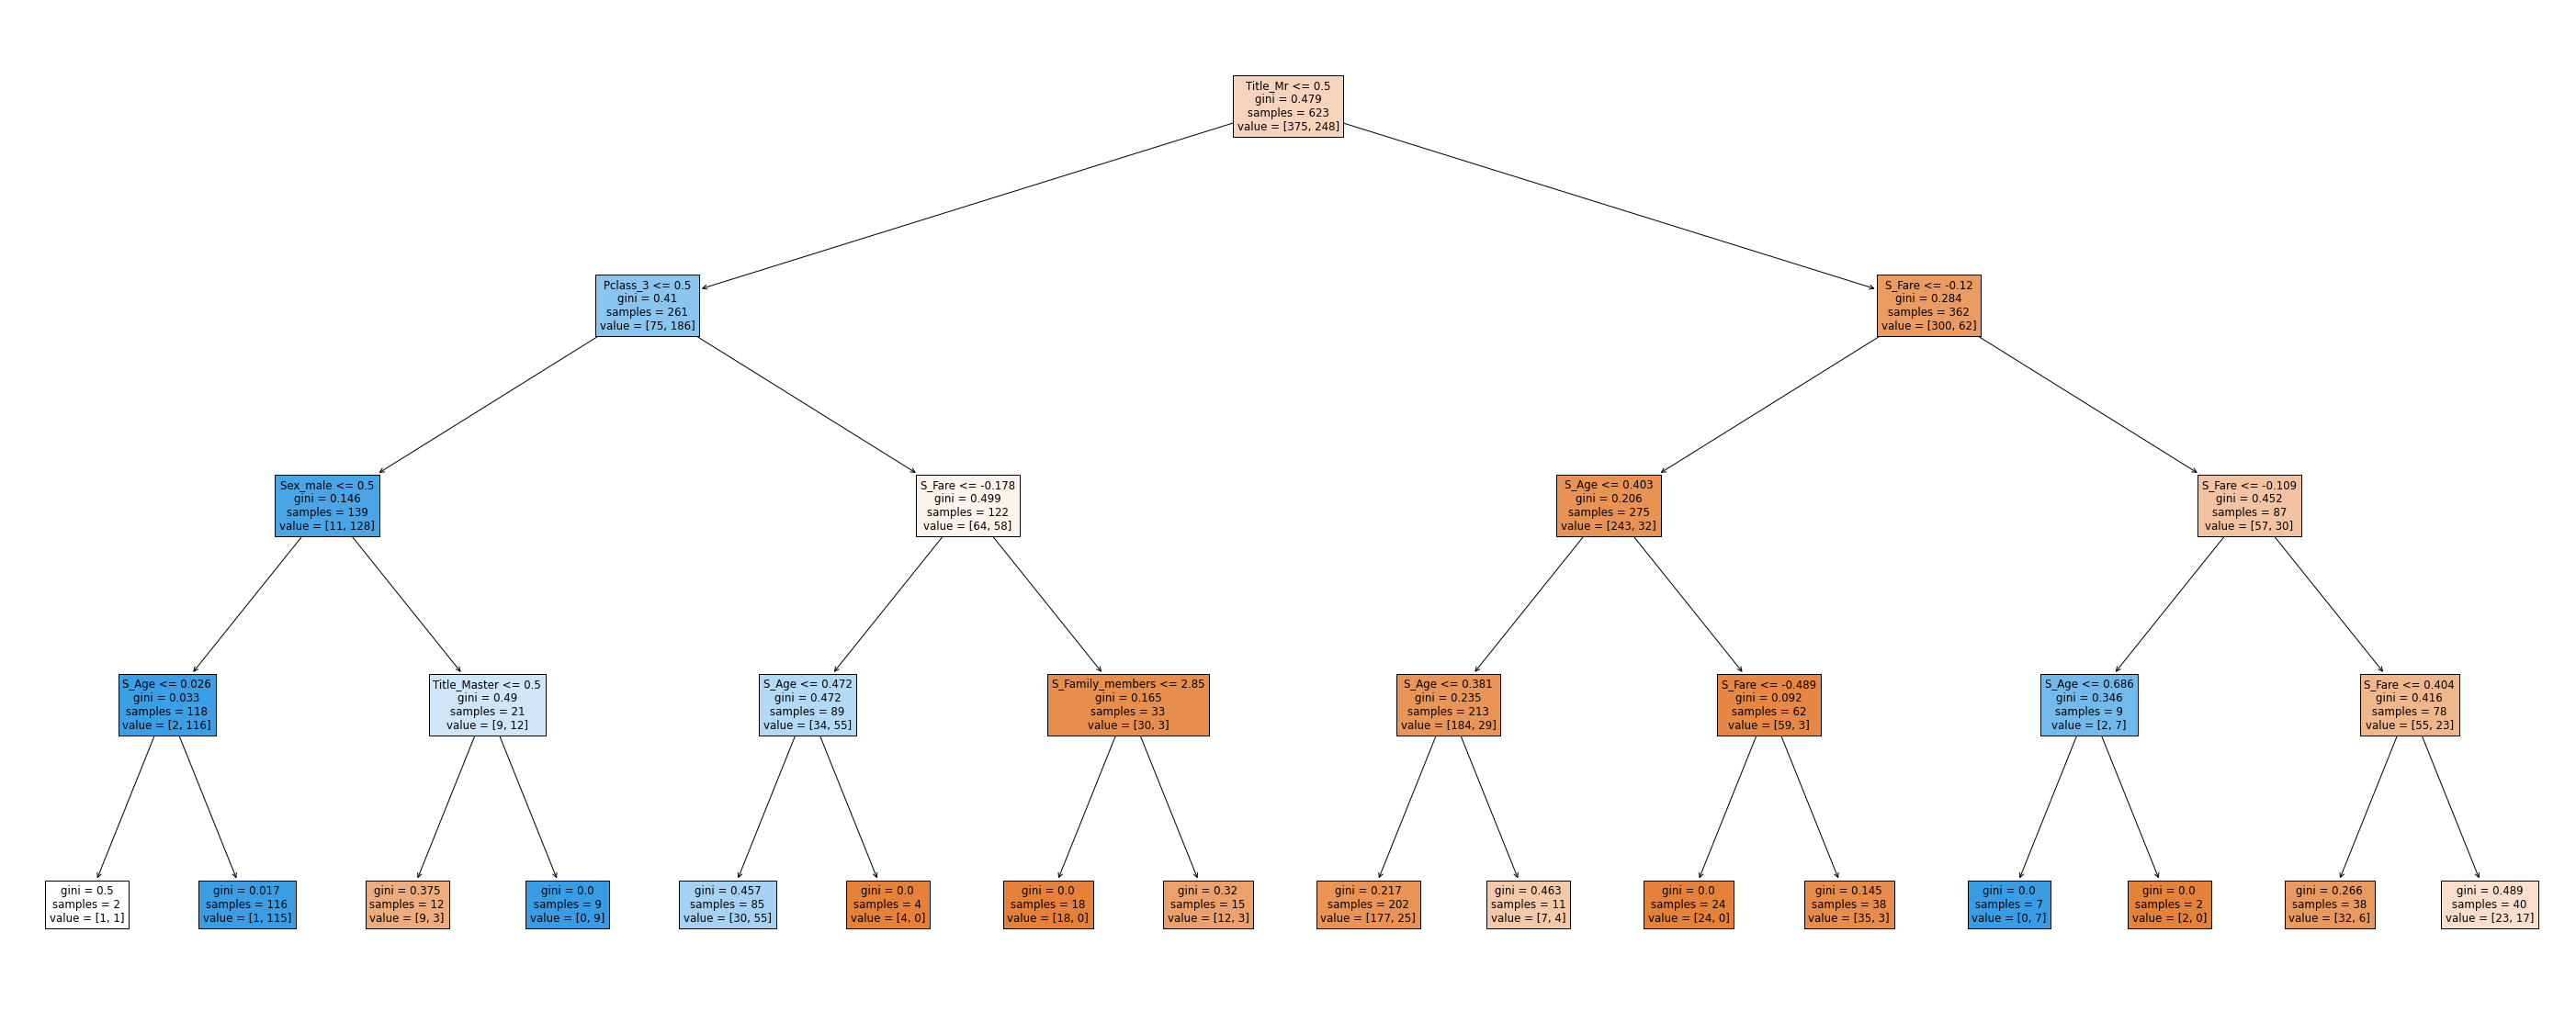

In [11]:
def decision_tree_result(n):
  decision_tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth=n)
  decision_tree_model.fit(X_train, y_train)
  y_output = decision_tree_model.predict(X_test)
  return accuracy_score(y_test,y_output)
dicty = {}
for i in range(1,14):
  dicty[i] = decision_tree_result(i)

max_i = 1
max = dicty[1]
for i in dicty:
  if max < dicty[i]:
    max = dicty[i]
    max_i = i

print("Max Accuracy depth =", max_i,"\nAccuracy value =", max)

best_decision_tree_model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth= max_i)
best_decision_tree_model.fit(X_train, y_train)
plt.figure(figsize = (50, 20))
tree = plot_tree(best_decision_tree_model, filled = True, feature_names=df_proccesd.columns)
plt.show()

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [10,20,30,40,50,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
criterion,max_depth,max_features,n_estimators = CV_rfc.best_params_.values()
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}


In [13]:
clf = RandomForestClassifier(random_state=42,criterion=criterion,max_depth= max_depth,max_features= max_features,n_estimators= n_estimators)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.835820895522388

### 2. Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [10,20,30,40,50,100,150,200],
    'learning_rate': [1,2,3,4],
    'algorithm' : ['SAMME','SAMME.R'],
}
CV_rfc = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
algorithm,learning_rate, n_estimators= CV_rfc.best_params_.values()

In [15]:
print(CV_rfc.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}


In [16]:
clf = AdaBoostClassifier(algorithm=algorithm, learning_rate= learning_rate, n_estimators= n_estimators)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.832089552238806

### 3. Pruning Techniques

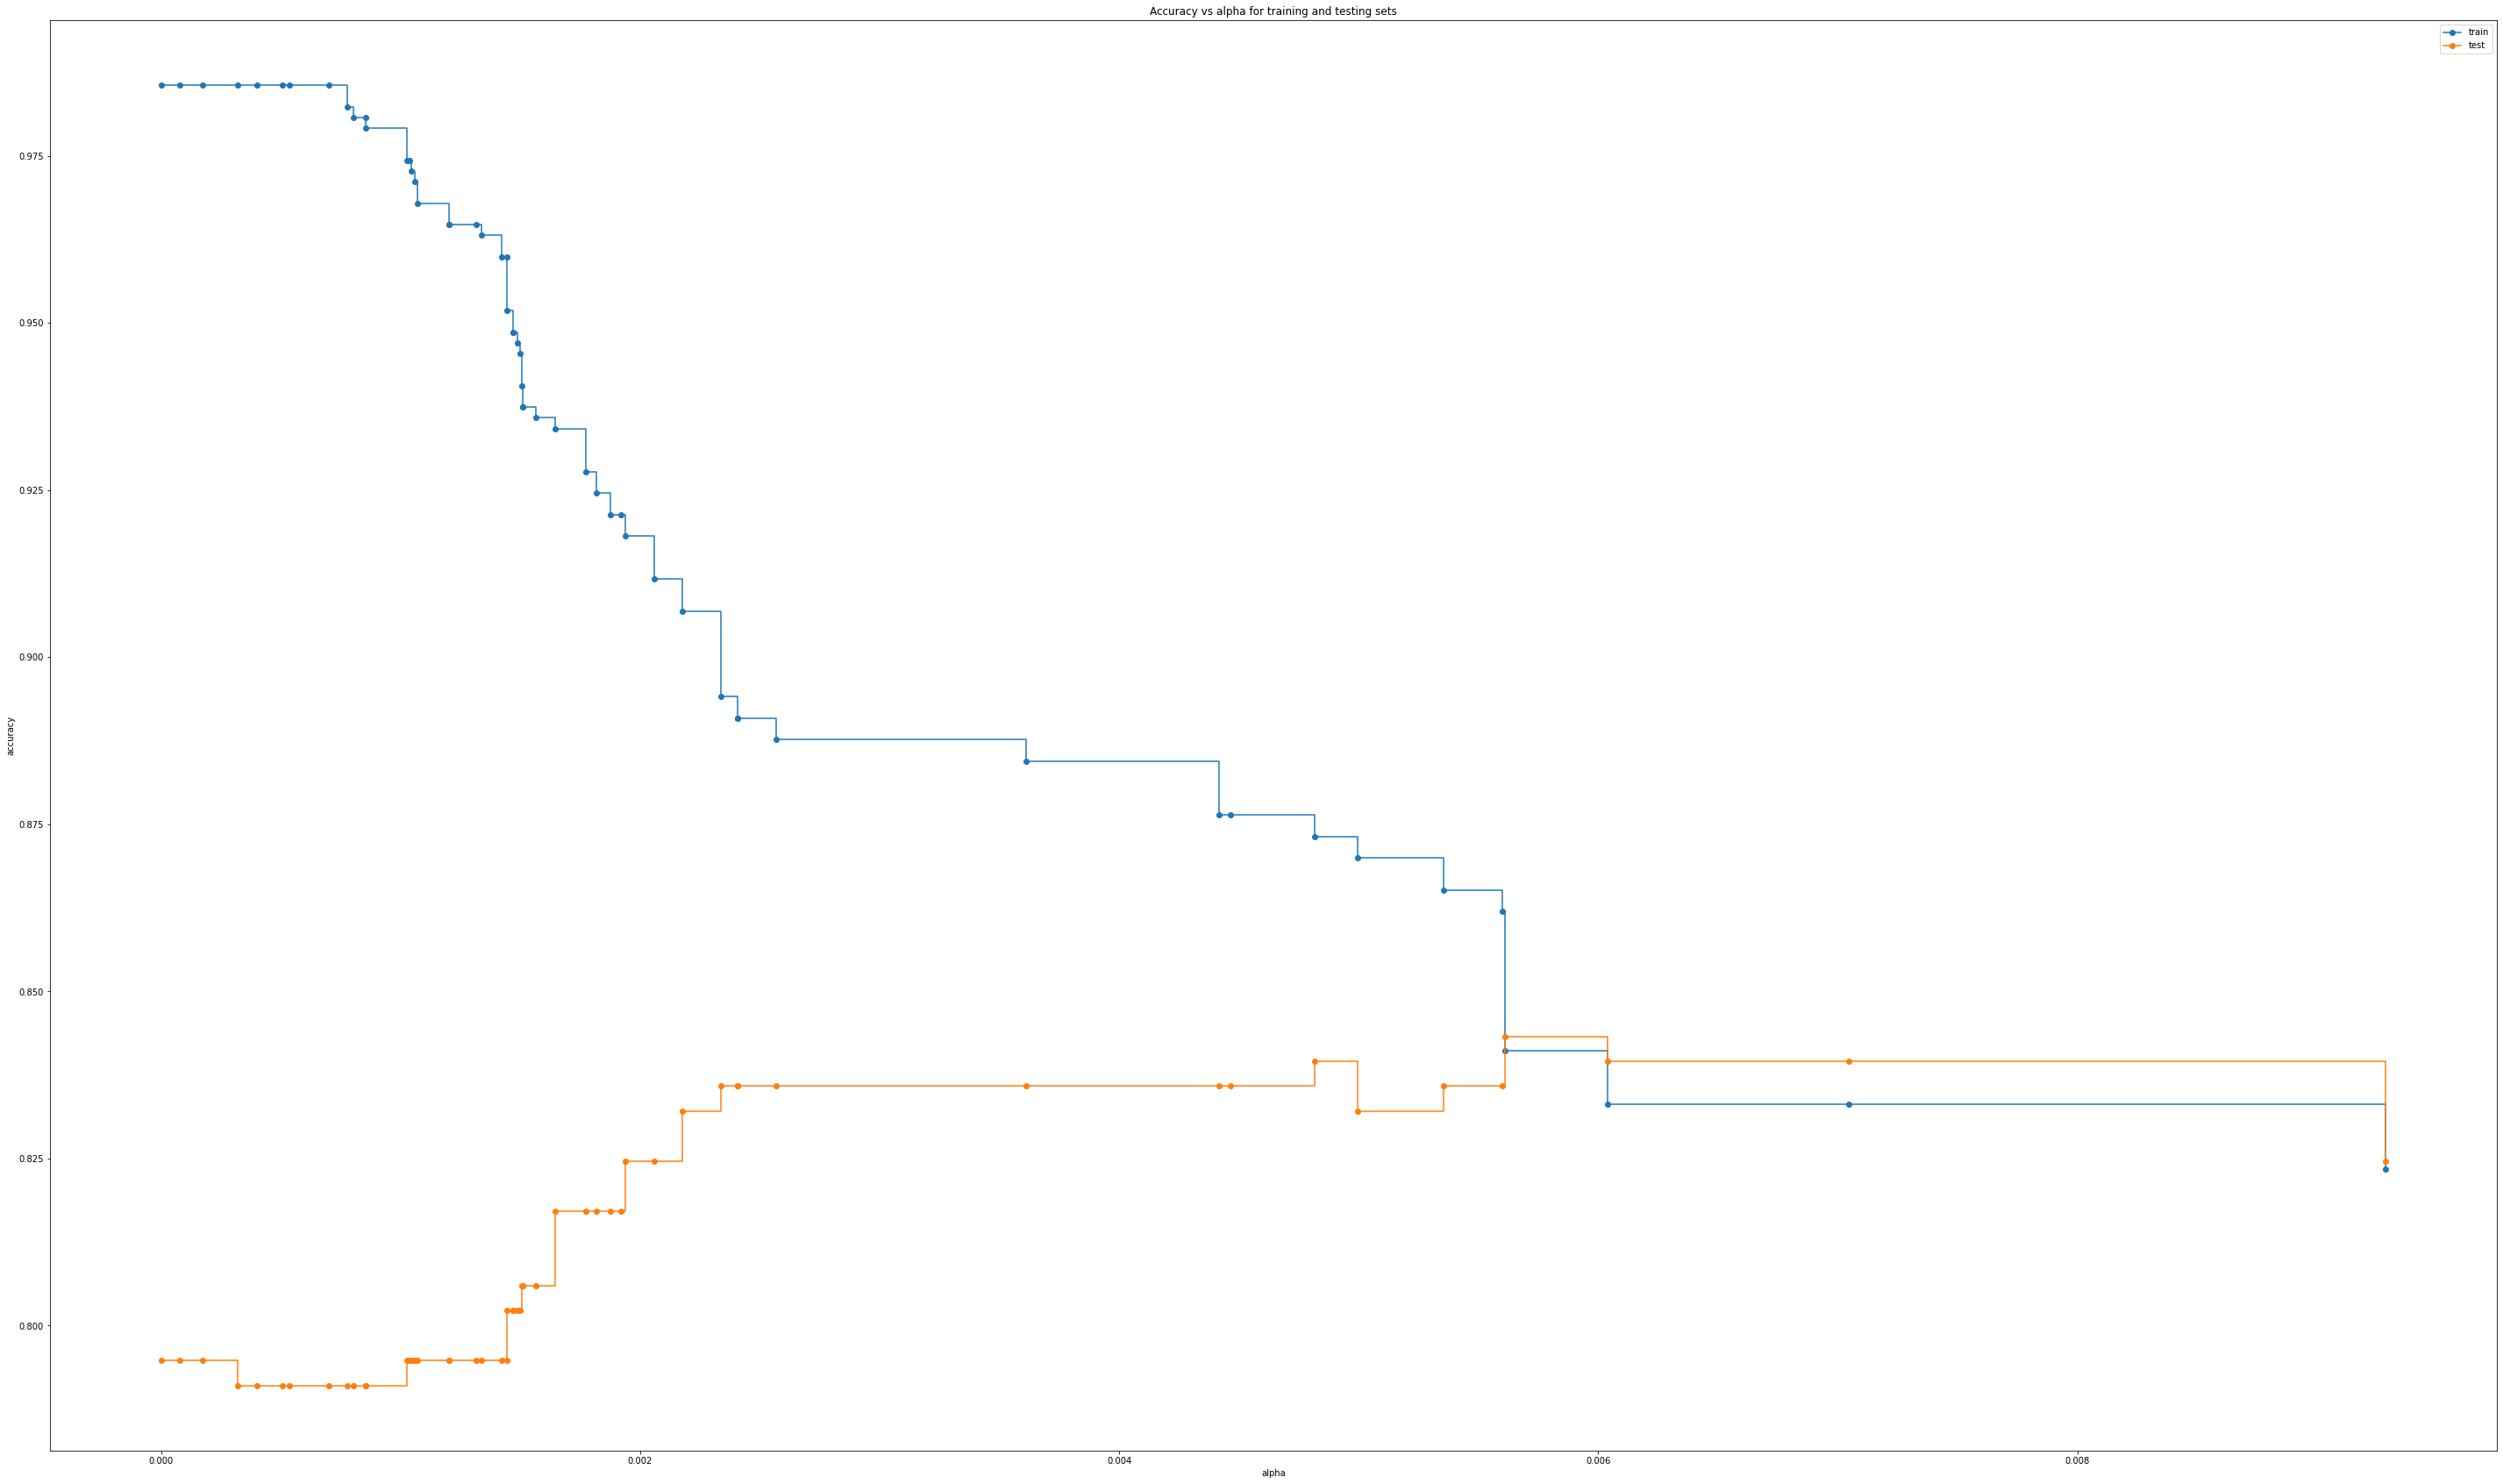

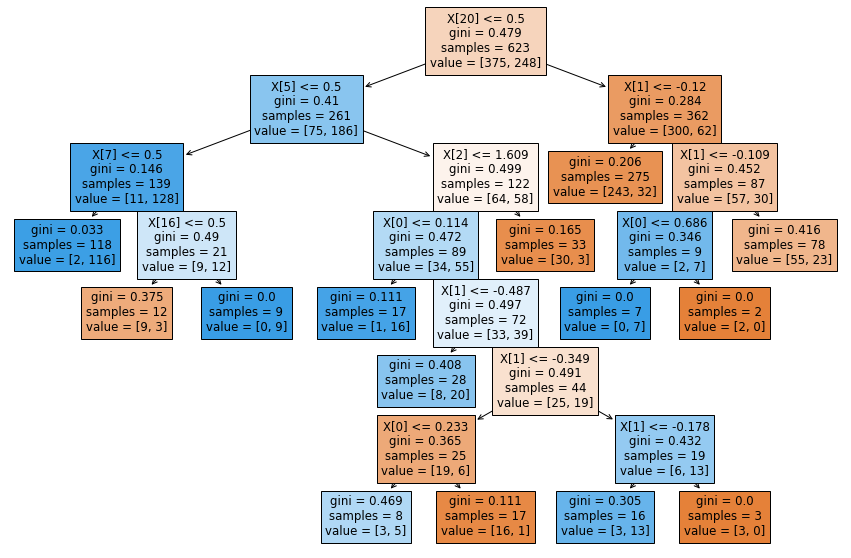

Accuracy :  0.8395522388059702


In [31]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(50,30))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:55], train_scores[:55], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:55], test_scores[:55], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00485)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
acc = accuracy_score(y_test, pred)
plt.figure(figsize=(15,10))
plot_tree(clf,filled=True)
plt.show()
print("Accuracy : ",acc)

## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


Pruning Technique so far gived the best accuray which is 0.8395522388059702
So it should be my final model

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023